# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

tips = sns.load_dataset('tips')
plt.figure(figsize=(20, 25))

<Figure size 2000x2500 with 0 Axes>

<Figure size 2000x2500 with 0 Axes>

In [30]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']


modelo = smf.ols(formula='tip ~ net_bill', data=tips).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):           5.02e-23
Time:                        17:42:31   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

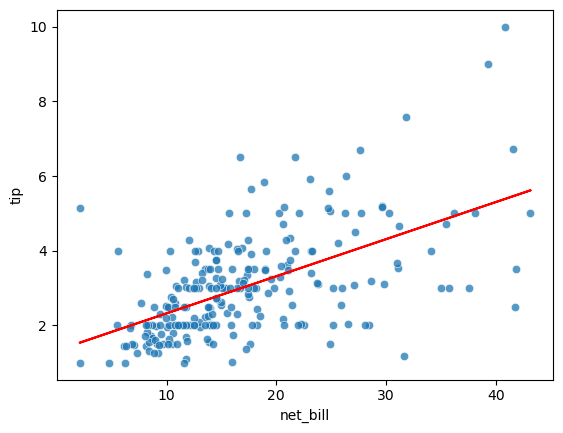

In [39]:
sns.scatterplot(x = 'net_bill', y = 'tip', data = tips, alpha = .75)
plt.plot(tips['net_bill'], modelo.predict(), color='red')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [11]:
modelo_log = smf.ols(formula='tip_pct ~ np.log(net_bill)', data=tips).fit()
modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           1.62e-13
Time:                        18:15:46   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6181      0.054     11.444      0.000       0.512       0.724
np.log(net_bill)    -0.1534      0.020     -7.820      0.000      -0.192      -0.115
==============================================================================
Omnibus:                      440.899   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           171509.052
Skew:                           9.850   Prob(JB):                         0.00
Kurtosis:                     131.381   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

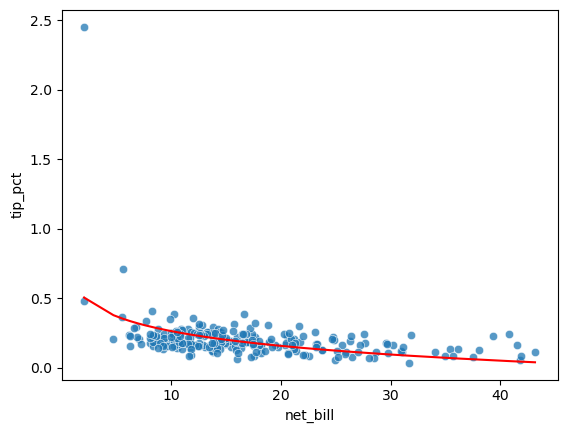

In [56]:
sorted_tips = tips.sort_values(by='net_bill')
predictions = modelo_log.predict(sorted_tips['net_bill'])

# Plotar o scatter plot dos dados
sns.scatterplot(x='net_bill', y='tip_pct', data=tips, alpha=0.75)

# Plotar a linha de regressão
plt.plot(sorted_tips['net_bill'], predictions, color='red')

# Mostrar o gráfico
plt.show()


###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [13]:
modelo_plinomio = smf.ols(formula='tip_pct ~ net_bill + I(net_bill**2)', data=tips).fit()
modelo_plinomio.summary()          

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           1.06e-09
Time:                        18:18:30   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4851      0.047     10.332      0.000       0.393       0.578
net_bill            -0.0268      0.005     -5.477      0.000      -0.036      -0.017
I(net_bill ** 2)     0.0005      0.000      4.356      0.000       0.000       0.001
==============================================================================
Omnibus:                      447.620   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186035.672
Skew:                          10.140   Prob(JB):                         0.00
Kurtosis:                     136.744   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

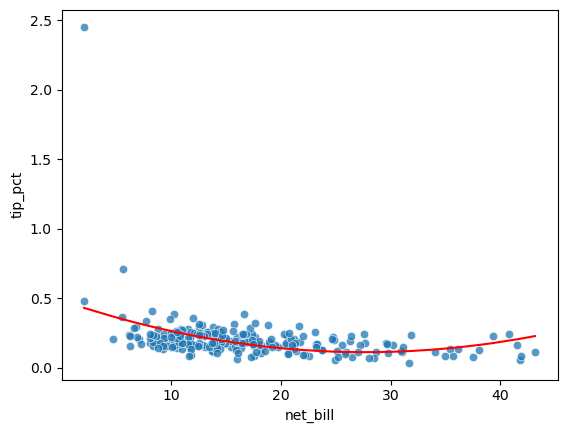

In [65]:
predictions2 = modelo_plinomio.predict(sorted_tips['net_bill'])

sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = 0.75)

plt.plot(sorted_tips['net_bill'],  predictions2, color='red')

plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [14]:
modelo_log_tip_pct = smf.ols(formula='np.log(tip_pct) ~ net_bill', data=tips).fit()

modelo_log_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           8.27e-16
Time:                        18:50:57   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.000      -1.385      -1.165
net_bill      -0.0259      0.003     -8.630      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.929   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.392
Skew:                           0.664   Prob(JB):                     7.78e-57
Kurtosis:                       7.864   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

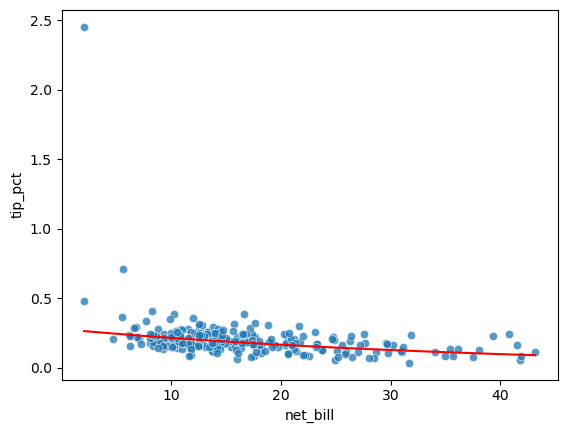

In [67]:
predictions3 = np.exp(modelo_log_tip_pct.predict(sorted_tips['net_bill']))

sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = 0.75)

plt.plot(sorted_tips['net_bill'],  predictions3, color='red')

plt.show()

In [15]:
r_quadrado_tip_pct = modelo_log_tip_pct.rsquared
r_quadrado_tip_pct

0.23534487140864324

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [16]:
modelo_log_tippct_log_netbill = smf.ols(formula='np.log(tip_pct) ~ np.log(net_bill)', data=tips).fit()
modelo_log_tippct_log_netbill.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           5.20e-20
Time:                        19:50:58   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)    -0.4849      0.048    -10.026      0.000      -0.580      -0.390
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

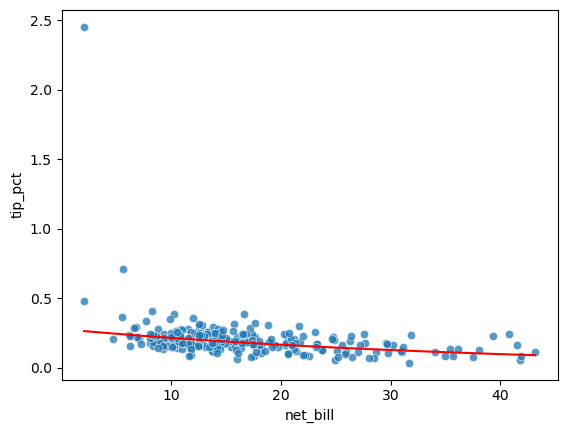

In [72]:
predictions4 = np.exp(modelo_log_tip_pct.predict(sorted_tips['net_bill']))
sns.scatterplot(x = 'net_bill', y = 'tip_pct', data = tips, alpha = 0.75)
plt.plot(sorted_tips['net_bill'],  predictions4, color='red')
plt.show()

###  6. qual modelo resultou no melhor ajuste?

In [22]:
print("R² de Modelo Linear =", modelo.rsquared)
print("R² de Modelo Log de net_bill =", modelo_log.rsquared)
print("R² de Modelo Polinomial =", modelo_plinomio.rsquared)
print("R² de Modelo Log de tip_pct =", modelo_log_tip_pct.rsquared)
print("R² de Modelo Log de tip_pct e net_bill =", modelo_log_tippct_log_netbill.rsquared)
print("Com base nesses resultados o mais adequado é o modelo linear com r² de 0.3325407312323705")

R² de Modelo Linear = 0.3325407312323705
R² de Modelo Log de net_bill = 0.20172884237605493
R² de Modelo Polinomial = 0.15760784734296152
R² de Modelo Log de tip_pct = 0.23534487140864324
R² de Modelo Log de tip_pct e net_bill = 0.2934740215080778
Com base nesses resultados o mais adequado é o modelo linear com r² de 0.3325407312323705
